Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


#### LDA

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [ ]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df[['sepal length (cm)','sepal width (cm)']]
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, variety)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)

array([2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2])

In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(15)

,0,1
0,2,2
1,0,0
2,1,1
3,0,0
4,1,2
5,0,0
6,1,1
7,1,1
8,1,1
9,2,2


In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.8947368421052632

In [ ]:
lda.coef_

array([[-5.70799329,  8.17534588],
       [ 1.88168475, -4.22269163],
       [ 3.92534458, -4.17490118]])

In [ ]:
lda.means_

array([[4.98947368, 3.39736842],
       [5.93611111, 2.75833333],
       [6.54736842, 2.97894737]])

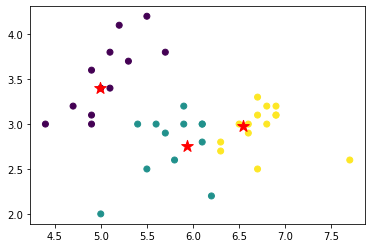

In [ ]:
plt.scatter(X_test[['sepal length (cm)']], X_test[['sepal width (cm)']], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

#### Кластеризация и K-Means

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


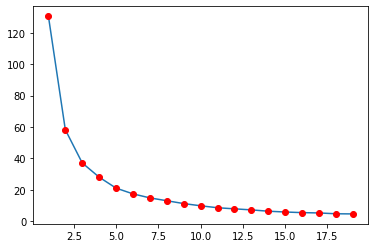

In [ ]:
k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

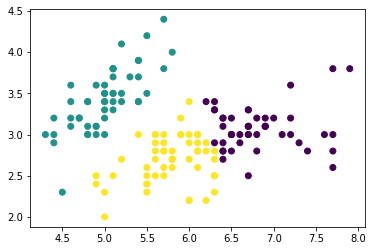

In [ ]:
plt.scatter(df[['sepal length (cm)']], df[['sepal width (cm)']], c=clusters)